> DataFrames.jl package

# Fetch and look at data

In [1]:
import Downloads

In [2]:
if isfile("new_puzzles.csv.bz2") 
    @info "file already present"
else
   @info "fetching file"
   Downloads.download("https://database.lichess.org/lichess_db_puzzle.csv.bz2",
                      "new_puzzles.csv.bz2")
end

[ Info: fetching file


"new_puzzles.csv.bz2"

In [4]:
import Pkg; Pkg.add("CodecBzip2")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed CodecBzip2 ─ v0.7.2
    Updating `~/.julia/environments/v1.8/Project.toml`
  [523fee87] + CodecBzip2 v0.7.2
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [523fee87] + CodecBzip2 v0.7.2
Precompiling project...
  ✓ CodecBzip2
  1 dependency successfully precompiled in 1 seconds. 187 already precompiled.


In [5]:
using CodecBzip2

In [7]:
compressed = read("new_puzzles.csv.bz2")

140692299-element Vector{UInt8}:
 0x42
 0x5a
 0x68
 0x39
 0x31
 0x41
 0x59
 0x26
 0x53
 0x59
 0xb6
 0x3a
 0xde
    ⋮
 0xff
 0xfc
 0x5d
 0xc9
 0x14
 0xe1
 0x42
 0x43
 0xf8
 0xb8
 0x60
 0x24

In [8]:
 plain = transcode(Bzip2Decompressor, compressed)

569860006-element Vector{UInt8}:
 0x30
 0x30
 0x30
 0x30
 0x38
 0x2c
 0x72
 0x36
 0x6b
 0x2f
 0x70
 0x70
 0x32
    ⋮
 0x6f
 0x6c
 0x6c
 0x65
 0x5f
 0x53
 0x79
 0x73
 0x74
 0x65
 0x6d
 0x0a

In [9]:
length(plain) / length(compressed)

4.050399418094661

In [10]:
?transcode

search: transcode



```
transcode(T, src)
```

Convert string data between Unicode encodings. `src` is either a `String` or a `Vector{UIntXX}` of UTF-XX code units, where `XX` is 8, 16, or 32. `T` indicates the encoding of the return value: `String` to return a (UTF-8 encoded) `String` or `UIntXX` to return a `Vector{UIntXX}` of UTF-`XX` data. (The alias [`Cwchar_t`](@ref) can also be used as the integer type, for converting `wchar_t*` strings used by external C libraries.)

The `transcode` function succeeds as long as the input data can be reasonably represented in the target encoding; it always succeeds for conversions between UTF-XX encodings, even for invalid Unicode data.

Only conversion to/from UTF-8 is currently supported.

# Examples

```jldoctest
julia> str = "αβγ"
"αβγ"

julia> transcode(UInt16, str)
3-element Vector{UInt16}:
 0x03b1
 0x03b2
 0x03b3

julia> transcode(String, transcode(UInt16, str))
"αβγ"
```

---

```
transcode(::Type{C}, data::Vector{UInt8})::Vector{UInt8} where C<:Codec
```

Transcode `data` by applying a codec `C()`.

Note that this method does allocation and deallocation of `C()` in every call, which is handy but less efficient when transcoding a number of objects. `transcode(codec, data)` is a recommended method in terms of performance.

## Examples

```julia
julia> using CodecZlib

julia> data = b"abracadabra";

julia> compressed = transcode(ZlibCompressor, data);

julia> decompressed = transcode(ZlibDecompressor, compressed);

julia> String(decompressed)
"abracadabra"

```

---

```
transcode(codec::Codec, data::Vector{UInt8})::Vector{UInt8}
```

Transcode `data` by applying `codec`.

Note that this method does not initialize or finalize `codec`. This is efficient when you transcode a number of pieces of data, but you need to call [`TranscodingStreams.initialize`](@ref) and [`TranscodingStreams.finalize`](@ref) explicitly.

## Examples

```julia
julia> using CodecZlib

julia> data = b"abracadabra";

julia> codec = ZlibCompressor();

julia> TranscodingStreams.initialize(codec)

julia> compressed = transcode(codec, data);

julia> TranscodingStreams.finalize(codec)

julia> codec = ZlibDecompressor();

julia> TranscodingStreams.initialize(codec)

julia> decompressed = transcode(codec, compressed);

julia> TranscodingStreams.finalize(codec)

julia> String(decompressed)
"abracadabra"

```


> **The code in the book doesn't actually work, had to add another column header otherwise completely fucks up the conversion**

In [31]:
open("puzzles.csv", "w") do io
    println(io, "PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,Other")
    write(io, plain)
end

569860006

In [32]:
readlines("puzzles.csv")

3080530-element Vector{String}:
 "PuzzleId,FEN,Moves,Rating,Ratin" ⋯ 19 bytes ⋯ "ty,NbPlays,Themes,GameUrl,Other"
 "00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N" ⋯ 120 bytes ⋯ "lichess.org/787zsVup/black#48,"
 "0000D,5rk1/1p3ppp/pq3b2/8/8/1P1" ⋯ 90 bytes ⋯ "ttps://lichess.org/F8M8OS71#53,"
 "0009B,r2qr1k1/b1p2ppp/pp4n1/P1P" ⋯ 165 bytes ⋯ "_Pawn_Game_Leonardis_Variation"
 "000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8" ⋯ 96 bytes ⋯ "tps://lichess.org/l6AejDMO#105,"
 "000Zo,4r3/1k6/pp3r2/1b2P2p/3R1p" ⋯ 94 bytes ⋯ "ttps://lichess.org/n8Ff742v#69,"
 "000aY,r4rk1/pp3ppp/2n1b3/q1pp2B" ⋯ 160 bytes ⋯ "_Defense_Benoni-Indian_Defense"
 "000hf,r1bqk2r/pp1nbNp1/2p1p2p/8" ⋯ 160 bytes ⋯ "rwitz_Defense_Other_variations"
 "000mr,5r1k/5rp1/p7/1b2B2p/1P1P1" ⋯ 97 bytes ⋯ "ttps://lichess.org/8sVpuwso#81,"
 "000rO,3R4/8/K7/pB2b3/1p6/1P2k3/" ⋯ 81 bytes ⋯ "tps://lichess.org/tzeeBEc2#115,"
 "000tp,4r3/5pk1/1p3np1/3p3p/2qQ4" ⋯ 101 bytes ⋯ "tps://lichess.org/GeXqsW90#67,"
 "00143,r2q1rk1/5ppp/1np5/p1b5/2p" ⋯ 145 bytes ⋯ "e,Scotch_Game_Mi

In [33]:
items = readlines("puzzles.csv")

3080530-element Vector{String}:
 "PuzzleId,FEN,Moves,Rating,Ratin" ⋯ 19 bytes ⋯ "ty,NbPlays,Themes,GameUrl,Other"
 "00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N" ⋯ 120 bytes ⋯ "lichess.org/787zsVup/black#48,"
 "0000D,5rk1/1p3ppp/pq3b2/8/8/1P1" ⋯ 90 bytes ⋯ "ttps://lichess.org/F8M8OS71#53,"
 "0009B,r2qr1k1/b1p2ppp/pp4n1/P1P" ⋯ 165 bytes ⋯ "_Pawn_Game_Leonardis_Variation"
 "000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8" ⋯ 96 bytes ⋯ "tps://lichess.org/l6AejDMO#105,"
 "000Zo,4r3/1k6/pp3r2/1b2P2p/3R1p" ⋯ 94 bytes ⋯ "ttps://lichess.org/n8Ff742v#69,"
 "000aY,r4rk1/pp3ppp/2n1b3/q1pp2B" ⋯ 160 bytes ⋯ "_Defense_Benoni-Indian_Defense"
 "000hf,r1bqk2r/pp1nbNp1/2p1p2p/8" ⋯ 160 bytes ⋯ "rwitz_Defense_Other_variations"
 "000mr,5r1k/5rp1/p7/1b2B2p/1P1P1" ⋯ 97 bytes ⋯ "ttps://lichess.org/8sVpuwso#81,"
 "000rO,3R4/8/K7/pB2b3/1p6/1P2k3/" ⋯ 81 bytes ⋯ "tps://lichess.org/tzeeBEc2#115,"
 "000tp,4r3/5pk1/1p3np1/3p3p/2qQ4" ⋯ 101 bytes ⋯ "tps://lichess.org/GeXqsW90#67,"
 "00143,r2q1rk1/5ppp/1np5/p1b5/2p" ⋯ 145 bytes ⋯ "e,Scotch_Game_Mi

In [34]:
split("PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl", ",")

9-element Vector{SubString{String}}:
 "PuzzleId"
 "FEN"
 "Moves"
 "Rating"
 "RatingDeviation"
 "Popularity"
 "NbPlays"
 "Themes"
 "GameUrl"

In [35]:
split(items[2], ",")

10-element Vector{SubString{String}}:
 "00008"
 "r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - - 0 24"
 "f2g3 e6e7 b2b1 b3c1 b1c1 h6c1"
 "1736"
 "78"
 "95"
 "3012"
 "crushing hangingPiece long middlegame"
 "https://lichess.org/787zsVup/black#48"
 ""

# Load data into DataFrame

In [36]:
import Pkg; Pkg.add("CSV")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [37]:
using CSV

In [38]:
import Pkg; Pkg.add("DataFrames")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [39]:
using DataFrames

In [40]:
puzzles = CSV.read("puzzles.csv", DataFrame, delim=','); # ; to not print dataframe to screen

┌ Warning: thread = 1 warning: parsed expected 10 columns, but didn't reach end of line around data row: 3. Parsing extra columns and widening final columnset
└ @ CSV ~/.julia/packages/CSV/b8ebJ/src/file.jl:577
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 4. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 5. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 8. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 9. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 10. Filling remaining columns 

┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 34. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 35. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 36. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 37. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 38. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 39. Filling remaining columns with `missing`
└ @ CSV ~/.julia/pac

┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 90. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 91. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 92. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 93. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 94. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 95. Filling remaining columns with `missing`
└ @ CSV ~/.julia/pac

In [41]:
?CSV.read

`CSV.read(source, sink::T; kwargs...)` => T

Read and parses a delimited file or files, materializing directly using the `sink` function. Allows avoiding excessive copies of columns for certain sinks like `DataFrame`.

# Example

```
julia> using CSV, DataFrames

julia> path = tempname();

julia> write(path, "a,b,c\n1,2,3");

julia> CSV.read(path, DataFrame)
1×3 DataFrame
 Row │ a      b      c
     │ Int64  Int64  Int64
─────┼─────────────────────
   1 │     1      2      3

julia> CSV.read(path, DataFrame; header=false)
2×3 DataFrame
 Row │ Column1  Column2  Column3
     │ String1  String1  String1
─────┼───────────────────────────
   1 │ a        b        c
   2 │ 1        2        3
```

# Arguments

## File layout options:

  * `header=1`: how column names should be determined; if given as an `Integer`, indicates the row to parse for column names; as an `AbstractVector{<:Integer}`, indicates a set of rows to be concatenated together as column names; `Vector{Symbol}` or `Vector{String}` give column names explicitly (should match # of columns in dataset); if a dataset doesn't have column names, either provide them as a `Vector`, or set `header=0` or `header=false` and column names will be auto-generated (`Column1`, `Column2`, etc.). Note that if a row number header and `comment` or `ignoreemptyrows` are provided, the header row will be the first non-commented/non-empty row *after* the row number, meaning if the provided row number is a commented row, the header row will actually be the next non-commented row.
  * `normalizenames::Bool=false`: whether column names should be "normalized" into valid Julia identifier symbols; useful when using the `tbl.col1` `getproperty` syntax or iterating rows and accessing column values of a row via `getproperty` (e.g. `row.col1`)
  * `skipto::Integer`: specifies the row where the data starts in the csv file; by default, the next row after the `header` row(s) is used. If `header=0`, then the 1st row is assumed to be the start of data; providing a `skipto` argument does *not* affect the `header` argument. Note that if a row number `skipto` and `comment` or `ignoreemptyrows` are provided, the data row will be the first non-commented/non-empty row *after* the row number, meaning if the provided row number is a commented row, the data row will actually be the next non-commented row.
  * `footerskip::Integer`: number of rows at the end of a file to skip parsing.  Do note that commented rows (see the `comment` keyword argument) *do not* count towards the row number provided for `footerskip`, they are completely ignored by the parser
  * `transpose::Bool`: read a csv file "transposed", i.e. each column is parsed as a row
  * `comment::String`: string that will cause rows that begin with it to be skipped while parsing. Note that if a row number header or `skipto` and `comment` are provided, the header/data row will be the first non-commented/non-empty row *after* the row number, meaning if the provided row number is a commented row, the header/data row will actually be the next non-commented row.
  * `ignoreemptyrows::Bool=true`: whether empty rows in a file should be ignored (if `false`, each column will be assigned `missing` for that empty row)
  * `select`: an `AbstractVector` of `Integer`, `Symbol`, `String`, or `Bool`, or a "selector" function of the form `(i, name) -> keep::Bool`; only columns in the collection or for which the selector function returns `true` will be parsed and accessible in the resulting `CSV.File`. Invalid values in `select` are ignored.
  * `drop`: inverse of `select`; an `AbstractVector` of `Integer`, `Symbol`, `String`, or `Bool`, or a "drop" function of the form `(i, name) -> drop::Bool`; columns in the collection or for which the drop function returns `true` will ignored in the resulting `CSV.File`. Invalid values in `drop` are ignored.
  * `limit`: an `Integer` to indicate a limited number of rows to parse in a csv file; use in combination with `skipto` to read a specific, contiguous chunk within a file; note for large files when multiple threads are used for parsing, the `limit` argument may not result in an exact # of rows parsed; use `threaded=false` to ensure an exact limit if necessary
  * `buffer_in_memory`: a `Bool`, default `false`, which controls whether a `Cmd`, `IO`, or gzipped source will be read/decompressed in memory vs. using a temporary file.
  * `ntasks::Integer=Threads.nthreads()`: [not applicable to `CSV.Rows`] for multithreaded parsed files, this controls the number of tasks spawned to read a file in concurrent chunks; defaults to the # of threads Julia was started with (i.e. `JULIA_NUM_THREADS` environment variable or `julia -t N`); setting `ntasks=1` will avoid any calls to `Threads.@spawn` and just read the file serially on the main thread; a single thread will also be used for smaller files by default (< 5_000 cells)
  * `rows_to_check::Integer=30`: [not applicable to `CSV.Rows`] a multithreaded parsed file will be split up into `ntasks` # of equal chunks; `rows_to_check` controls the # of rows are checked to ensure parsing correctly found valid rows; for certain files with very large quoted text fields, `lines_to_check` may need to be higher (10, 30, etc.) to ensure parsing correctly finds these rows
  * `source`: [only applicable for vector of inputs to `CSV.File`] a `Symbol`, `String`, or `Pair` of `Symbol` or `String` to `Vector`. As a single `Symbol` or `String`, provides the column name that will be added to the parsed columns, the values of the column will be the input "name" (usually file name) of the input from whence the value was parsed. As a `Pair`, the 2nd part of the pair should be a `Vector` of values matching the length of the # of inputs, where each value will be used instead of the input name for that inputs values in the auto-added column.

## Parsing options:

  * `missingstring`: either a `nothing`, `String`, or `Vector{String}` to use as sentinel values that will be parsed as `missing`; if `nothing` is passed, no sentinel/missing values will be parsed; by default, `missingstring=""`, which means only an empty field (two consecutive delimiters) is considered `missing`
  * `delim=','`: a `Char` or `String` that indicates how columns are delimited in a file; if no argument is provided, parsing will try to detect the most consistent delimiter on the first 10 rows of the file
  * `ignorerepeated::Bool=false`: whether repeated (consecutive/sequential) delimiters should be ignored while parsing; useful for fixed-width files with delimiter padding between cells
  * `quoted::Bool=true`: whether parsing should check for `quotechar` at the start/end of cells
  * `quotechar='"'`, `openquotechar`, `closequotechar`: a `Char` (or different start and end characters) that indicate a quoted field which may contain textual delimiters or newline characters
  * `escapechar='"'`: the `Char` used to escape quote characters in a quoted field
  * `dateformat::Union{String, Dates.DateFormat, Nothing, AbstractDict}`: a date format string to indicate how Date/DateTime columns are formatted for the entire file; if given as an `AbstractDict`, date format strings to indicate how the Date/DateTime columns corresponding to the keys are formatted. The Dict can map column index `Int`, or name `Symbol` or `String` to the format string for that column.
  * `decimal='.'`: a `Char` indicating how decimals are separated in floats, i.e. `3.14` uses `'.'`, or `3,14` uses a comma `','`
  * `truestrings`, `falsestrings`: `Vector{String}`s that indicate how `true` or `false` values are represented; by default `"true", "True", "TRUE", "T", "1"` are used to detect `true` and `"false", "False", "FALSE", "F", "0"` are used to detect `false`; note that columns with only `1` and `0` values will default to `Int64` column type unless explicitly requested to be `Bool` via `types` keyword argument
  * `stripwhitespace=false`: if true, leading and trailing whitespace are stripped from string values, including column names

## Column Type Options:

  * `types`: a single `Type`, `AbstractVector` or `AbstractDict` of types, or a function of the form `(i, name) -> Union{T, Nothing}` to be used for column types; if a single `Type` is provided, *all* columns will be parsed with that single type; an `AbstractDict` can map column index `Integer`, or name `Symbol` or `String` to type for a column, i.e. `Dict(1=>Float64)` will set the first column as a `Float64`, `Dict(:column1=>Float64)` will set the column named `column1` to `Float64` and, `Dict("column1"=>Float64)` will set the `column1` to `Float64`; if a `Vector` is provided, it must match the # of columns provided or detected in `header`. If a function is provided, it takes a column index and name as arguments, and should return the desired column type for the column, or `nothing` to signal the column's type should be detected while parsing.
  * `typemap::Dict{Type, Type}`: a mapping of a type that should be replaced in every instance with another type, i.e. `Dict(Float64=>String)` would change every detected `Float64` column to be parsed as `String`; only "standard" types are allowed to be mapped to another type, i.e. `Int64`, `Float64`, `Date`, `DateTime`, `Time`, and `Bool`. If a column of one of those types is "detected", it will be mapped to the specified type.
  * `pool::Union{Bool, Real, AbstractVector, AbstractDict, Function, Tuple{Float64, Int}}=(0.2, 500)`: [not supported by `CSV.Rows`] controls whether columns will be built as `PooledArray`; if `true`, all columns detected as `String` will be pooled; alternatively, the proportion of unique values below which `String` columns should be pooled (meaning that if the # of unique strings in a column is under 25%, `pool=0.25`, it will be pooled). If provided as a `Tuple{Float64, Int}` like `(0.2, 500)`, it represents the percent cardinality threshold as the 1st tuple element (`0.2`), and an upper limit for the # of unique values (`500`), under which the column will be pooled; this is the default (`pool=(0.2, 500)`). If an `AbstractVector`, each element should be `Bool`, `Real`, or `Tuple{Float64, Int}` and the # of elements should match the # of columns in the dataset; if an `AbstractDict`, a `Bool`, `Real`, or `Tuple{Float64, Int}` value can be provided for individual columns where the dict key is given as column index `Integer`, or column name as `Symbol` or `String`. If a function is provided, it should take a column index and name as 2 arguments, and return a `Bool`, `Real`, `Tuple{Float64, Int}`, or `nothing` for each column.
  * `downcast::Bool=false`: controls whether columns detected as `Int64` will be "downcast" to the smallest possible integer type like `Int8`, `Int16`, `Int32`, etc.
  * `stringtype=InlineStrings.InlineString`: controls how detected string columns will ultimately be returned; default is `InlineString`, which stores string data in a fixed-size primitive type that helps avoid excessive heap memory usage; if a column has values longer than 32 bytes, it will default to `String`. If `String` is passed, all string columns will just be normal `String` values. If `PosLenString` is passed, string columns will be returned as `PosLenStringVector`, which is a special "lazy" `AbstractVector` that acts as a "view" into the original file data. This can lead to the most efficient parsing times, but note that the "view" nature of `PosLenStringVector` makes it read-only, so operations like `push!`, `append!`, or `setindex!` are not supported. It also keeps a reference to the entire input dataset source, so trying to modify or delete the underlying file, for example, may fail
  * `strict::Bool=false`: whether invalid values should throw a parsing error or be replaced with `missing`
  * `silencewarnings::Bool=false`: if `strict=false`, whether invalid value warnings should be silenced
  * `maxwarnings::Int=100`: if more than `maxwarnings` number of warnings are printed while parsing, further warnings will be silenced by default; for multithreaded parsing, each parsing task will print up to `maxwarnings`
  * `debug::Bool=false`: passing `true` will result in many informational prints while a dataset is parsed; can be useful when reporting issues or figuring out what is going on internally while a dataset is parsed
  * `validate::Bool=true`: whether or not to validate that columns specified in the `types`, `dateformat` and `pool` keywords are actually found in the data. If `false` no validation is done, meaning no error will be thrown if `types`/`dateformat`/`pool` specify settings for columns not actually found in the data.

## Iteration options:

  * `reusebuffer=false`: [only supported by `CSV.Rows`] while iterating, whether a single row buffer should be allocated and reused on each iteration; only use if each row will be iterated once and not re-used (e.g. it's not safe to use this option if doing `collect(CSV.Rows(file))` because only current iterated row is "valid")


In [42]:
puzzles

Row,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,Other,Column11
,String7,String,String,Int64,Int64,Int64,Int64,String,String,String?,String?
1,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - - 0 24,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1736,78,95,3012,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,missing,missing
2,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - - 2 27,d3d6 f8d8 d6d8 f6d8,1513,74,96,16164,advantage endgame short,https://lichess.org/F8M8OS71#53,missing,missing
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP1P/RN1QR1K1 b - - 1 16,b6c5 e2g4 h3g4 d1g4,1130,75,86,518,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game,Kings_Pawn_Game_Leonardis_Variation
4,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1495,155,100,14,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#105,missing,missing
5,000Zo,4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w - - 0 35,e5f6 e8e1 g1f2 e1f1,1652,149,100,23,endgame mate mateIn2 short,https://lichess.org/n8Ff742v#69,missing,missing
6,000aY,r4rk1/pp3ppp/2n1b3/q1pp2B1/8/P1Q2NP1/1PP1PP1P/2KR3R w - - 0 15,g5e7 a5c3 b2c3 c6e7,1436,76,86,489,advantage master middlegame short,https://lichess.org/iihZGl6t#29,Benoni_Defense,Benoni_Defense_Benoni-Indian_Defense
7,000hf,r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3R1RK1 b kq - 0 19,e8f7 e2e6 f7f8 e6f7,1574,76,88,456,mate mateIn2 middlegame short,https://lichess.org/71ygsFeE/black#38,Horwitz_Defense,Horwitz_Defense_Other_variations
8,000mr,5r1k/5rp1/p7/1b2B2p/1P1P1Pq1/2R1Q3/P3p1P1/2R3K1 w - - 0 41,e3g3 f7f4 e5f4 f8f4,1478,279,100,10,crushing middlegame short,https://lichess.org/8sVpuwso#81,missing,missing
9,000rO,3R4/8/K7/pB2b3/1p6/1P2k3/3p4/8 w - - 4 58,a6a5 e5c7 a5b4 c7d8,1039,80,85,61,crushing endgame fork short,https://lichess.org/tzeeBEc2#115,missing,missing


In [43]:
show(describe(puzzles); truncate=14)

11×7 DataFrame
 Row │ variable         mean     min              median  max              nmi ⋯
     │ Symbol           Union…   Any              Union…  Any              Int ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ PuzzleId                  00008                    zzzhg                ⋯
   2 │ FEN                       1B1K4/2P5/4k3/…          rrqb2k1/3n2p1/…
   3 │ Moves                     a1a2 a3a2 b2a2…          h8h7 h6h7 g7h7…
   4 │ Rating           1553.26  545              1513.0  3024
   5 │ RatingDeviation  104.934  49               79.0    500                  ⋯
   6 │ Popularity       83.8078  -100             90.0    200
   7 │ NbPlays          1101.28  0                216.0   310341
   8 │ Themes                    advancedPawn a…          opening
   9 │ GameUrl                   https://liches…          https://liches…      ⋯
  10 │ Other                     Alekhine_Defen…          Zukertort_Open…   23
  11 │ Column11 

In [44]:
describe(puzzles)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,PuzzleId,,00008,,zzzhg,0,String7
2,FEN,,1B1K4/2P5/4k3/2N4p/6b1/8/r6P/8 b - - 4 53,,rrqb2k1/3n2p1/2p1bn1p/NpPp1p2/1P1PpP2/R1N1P3/1B1QB1PP/R5K1 b - - 5 21,0,String
3,Moves,,a1a2 a3a2 b2a2 b4c4 d4d5 c4d5 a2b3 d5d4 h2h4 f6f5 b3c2 d4e3,,h8h7 h6h7 g7h7 g4f6 h7g7 f6d7,0,String
4,Rating,1553.26,545,1513.0,3024,0,Int64
5,RatingDeviation,104.934,49,79.0,500,0,Int64
6,Popularity,83.8078,-100,90.0,200,0,Int64
7,NbPlays,1101.28,0,216.0,310341,0,Int64
8,Themes,,advancedPawn advantage attackingF2F7 attraction bishopEndgame middlegame oneMove,,opening,0,String
9,GameUrl,,https://lichess.org/0001qFHT/black#48,,https://lichess.org/zzzxPify#57,0,String


* variable—Name stored as a Symbol
* mean—Average of values if the column contains numeric data
* min—Minimum value if the column contains data that can have a defined
order
* median—Median of values if the column contains numeric data
* max—Maximum value if the column contains data that can have a defined
order
* nmissing—Number of missing values
* eltype—Type of values stored

## So columns are

* `PuzzleId` A unique identifier of the puzzle
* `FEN` An encoding of a starting position of the puzzle
* `Moves` Moves that are a solution to the puzzle
* `Rating` Difficulty of the puzzle
* `RatingDeviation` Accuracy of assessment of difficulty of the puzzle
* `Popularity` How much the puzzle is liked by users (the higher, the better) 
* `NbPlays` Number of times a given puzzle was played
* `Themes` Description of chess themes featured by the puzzle
* `GameUrl` URL to the source game from which the puzzle was taken
* `Other` ????

In [46]:
# CSV.write("puzzles2.csv", puzzles)

# Columns from DataFrames

In [47]:
puzzles.Rating

3080529-element Vector{Int64}:
 1736
 1513
 1130
 1495
 1652
 1436
 1574
 1478
 1039
 2051
 1841
 2652
 1128
    ⋮
  853
 1706
 1784
 1925
  830
 1856
 1015
 1076
  979
 1740
 2480
 2203

In [48]:
puzzles.GameUrl

3080529-element Vector{String}:
 "https://lichess.org/787zsVup/black#48"
 "https://lichess.org/F8M8OS71#53"
 "https://lichess.org/4MWQCxQ6/black#32"
 "https://lichess.org/l6AejDMO#105"
 "https://lichess.org/n8Ff742v#69"
 "https://lichess.org/iihZGl6t#29"
 "https://lichess.org/71ygsFeE/black#38"
 "https://lichess.org/8sVpuwso#81"
 "https://lichess.org/tzeeBEc2#115"
 "https://lichess.org/GeXqsW90#67"
 "https://lichess.org/jcuxlI63/black#34"
 "https://lichess.org/H1ARO2GL/black#40"
 "https://lichess.org/84RH3LaP/black#42"
 ⋮
 "https://lichess.org/aBcnhoi2/black#34"
 "https://lichess.org/Kite8I8w#45"
 "https://lichess.org/sVDZKwQJ/black#20"
 "https://lichess.org/f1RiiSwW/black#86"
 "https://lichess.org/8OHS8UmY#61"
 "https://lichess.org/8SAGnBjb/black#32"
 "https://lichess.org/0YzF6l5X#19"
 "https://lichess.org/Yc8Fdtc0/black#52"
 "https://lichess.org/jRTmvh6y#55"
 "https://lichess.org/hZWTYIAT#69"
 "https://lichess.org/N092KH4f/black#20"
 "https://lichess.org/f4w3Ljxp/black#24"

In [49]:
using BenchmarkTools

In [50]:
@btime $puzzles.Rating;

  4.625 ns (0 allocations: 0 bytes)


Only view/does not copy, so fast

`[Row indexing, Column Indexing]`

In [51]:
puzzles[1:10, "Rating"]

10-element Vector{Int64}:
 1736
 1513
 1130
 1495
 1652
 1436
 1574
 1478
 1039
 2051

In [53]:
puzzles[1:10, 4:5]

Row,Rating,RatingDeviation
,Int64,Int64
1,1736,78
2,1513,74
3,1130,75
4,1495,155
5,1652,149
6,1436,76
7,1574,76
8,1478,279
9,1039,80


In [54]:
hasproperty(puzzles, "Rating")

true

In [55]:
hasproperty(puzzles, "Not a column")

false

In [56]:
using Plots


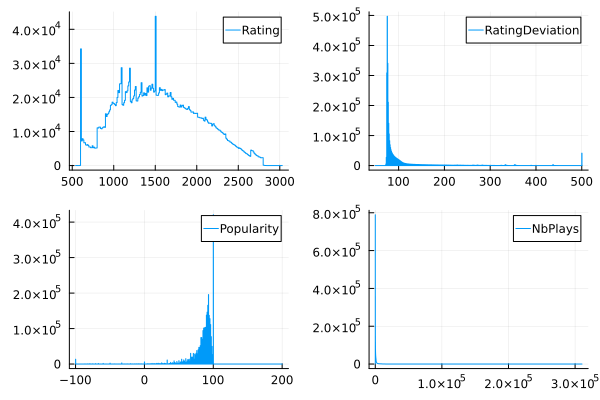

In [57]:
plot(histogram(puzzles.Rating; label="Rating"),
            histogram(puzzles.RatingDeviation; label="RatingDeviation"),
            histogram(puzzles.Popularity; label="Popularity"),
            histogram(puzzles.NbPlays; label="NbPlays"))

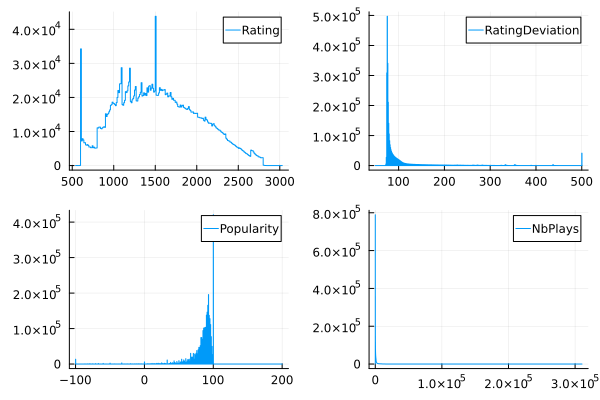

In [58]:
plot([histogram(puzzles[!, col]; label=col) for
                    col in ["Rating", "RatingDeviation",
                             "Popularity", "NbPlays"]]...)


# Other formats

In [60]:
import Pkg; Pkg.add("Arrow")

   Resolving package versions...
   Installed CEnum ─────── v0.4.2
   Installed Lz4_jll ───── v1.9.3+0
   Installed ArrowTypes ── v2.0.2
   Installed Mocking ───── v0.7.6
   Installed CodecLz4 ──── v0.4.0
   Installed BitIntegers ─ v0.2.7
   Installed ExprTools ─── v0.1.9
   Installed CodecZstd ─── v0.7.2
   Installed TimeZones ─── v1.9.1
   Installed Arrow ─────── v2.5.0
    Updating `~/.julia/environments/v1.8/Project.toml`
  [69666777] + Arrow v2.5.0
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [69666777] + Arrow v2.5.0
  [31f734f8] + ArrowTypes v2.0.2
  [c3b6d118] + BitIntegers v0.2.7
  [fa961155] + CEnum v0.4.2
  [5ba52731] + CodecLz4 v0.4.0
  [6b39b394] + CodecZstd v0.7.2
  [e2ba6199] + ExprTools v0.1.9
  [78c3b35d] + Mocking v0.7.6
  [f269a46b] + TimeZones v1.9.1
  [5ced341a] + Lz4_jll v1.9.3+0
  [4af54fe1] + LazyArtifacts
    Building TimeZones → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/a92ec4466fc6e3dd704e2668b5e7f24add36d242/build.log`
Precomp

In [61]:
using Arrow

In [62]:
Arrow.write("puzzles.arrow", puzzles)

"puzzles.arrow"

In [63]:
arrow_table = Arrow.Table("puzzles.arrow")

Arrow.Table with 3080529 rows, 11 columns, and schema:
 :PuzzleId         String
 :FEN              String
 :Moves            String
 :Rating           Int64
 :RatingDeviation  Int64
 :Popularity       Int64
 :NbPlays          Int64
 :Themes           String
 :GameUrl          String
 :Other            Union{Missing, String}
 :Column11         Union{Missing, String}

In [64]:
puzzles_arrow = DataFrame(arrow_table);

In [66]:
puzzles_arrow

Row,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,Other,Column11
,String,String,String,Int64,Int64,Int64,Int64,String,String,String?,String?
1,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - - 0 24,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1736,78,95,3012,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,missing,missing
2,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - - 2 27,d3d6 f8d8 d6d8 f6d8,1513,74,96,16164,advantage endgame short,https://lichess.org/F8M8OS71#53,missing,missing
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP1P/RN1QR1K1 b - - 1 16,b6c5 e2g4 h3g4 d1g4,1130,75,86,518,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game,Kings_Pawn_Game_Leonardis_Variation
4,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1495,155,100,14,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#105,missing,missing
5,000Zo,4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w - - 0 35,e5f6 e8e1 g1f2 e1f1,1652,149,100,23,endgame mate mateIn2 short,https://lichess.org/n8Ff742v#69,missing,missing
6,000aY,r4rk1/pp3ppp/2n1b3/q1pp2B1/8/P1Q2NP1/1PP1PP1P/2KR3R w - - 0 15,g5e7 a5c3 b2c3 c6e7,1436,76,86,489,advantage master middlegame short,https://lichess.org/iihZGl6t#29,Benoni_Defense,Benoni_Defense_Benoni-Indian_Defense
7,000hf,r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3R1RK1 b kq - 0 19,e8f7 e2e6 f7f8 e6f7,1574,76,88,456,mate mateIn2 middlegame short,https://lichess.org/71ygsFeE/black#38,Horwitz_Defense,Horwitz_Defense_Other_variations
8,000mr,5r1k/5rp1/p7/1b2B2p/1P1P1Pq1/2R1Q3/P3p1P1/2R3K1 w - - 0 41,e3g3 f7f4 e5f4 f8f4,1478,279,100,10,crushing middlegame short,https://lichess.org/8sVpuwso#81,missing,missing
9,000rO,3R4/8/K7/pB2b3/1p6/1P2k3/3p4/8 w - - 4 58,a6a5 e5c7 a5b4 c7d8,1039,80,85,61,crushing endgame fork short,https://lichess.org/tzeeBEc2#115,missing,missing


Note, not using standard Julia data type for columns now

In [76]:
puzzles_arrow.Rating

3080529-element Arrow.Primitive{Int64, Vector{Int64}}:
 1736
 1513
 1130
 1495
 1652
 1436
 1574
 1478
 1039
 2051
 1841
 2652
 1128
    ⋮
  853
 1706
 1784
 1925
  830
 1856
 1015
 1076
  979
 1740
 2480
 2203

In [68]:
import Pkg; Pkg.add("SQLite")

   Resolving package versions...
   Installed SQLite_jll ── v3.41.0+0
   Installed DBInterface ─ v2.5.0
   Installed SQLite ────── v1.6.0
    Updating `~/.julia/environments/v1.8/Project.toml`
  [0aa819cd] + SQLite v1.6.0
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [a10d1c49] + DBInterface v2.5.0
  [0aa819cd] + SQLite v1.6.0
  [76ed43ae] + SQLite_jll v3.41.0+0
Precompiling project...
  ✓ DBInterface
  ✓ SQLite_jll
  ✓ SQLite
  3 dependencies successfully precompiled in 2 seconds. 202 already precompiled.


In [69]:
using SQLite

In [70]:
db = SQLite.DB("puzzles.db")

SQLite.DB("puzzles.db")

In [71]:
SQLite.load!(puzzles, db, "puzzles")

"puzzles"

In [72]:
SQLite.tables(db)

1-element Vector{SQLite.DBTable}:
 SQLite.DBTable("puzzles", Tables.Schema:
 :PuzzleId         Union{Missing, String}
 :FEN              Union{Missing, String}
 :Moves            Union{Missing, String}
 :Rating           Union{Missing, Int64}
 :RatingDeviation  Union{Missing, Int64}
 :Popularity       Union{Missing, Int64}
 :NbPlays          Union{Missing, Int64}
 :Themes           Union{Missing, String}
 :GameUrl          Union{Missing, String}
 :Other            Union{Missing, String}
 :Column11         Union{Missing, String})

In [73]:
query = DBInterface.execute(db, "SELECT * FROM puzzles")

SQLite.Query{false}(SQLite.Stmt(SQLite.DB("puzzles.db"), Base.RefValue{Ptr{SQLite.C.sqlite3_stmt}}(Ptr{SQLite.C.sqlite3_stmt} @0x000000015044bb80), Dict{Int64, Any}()), Base.RefValue{Int32}(100), [:PuzzleId, :FEN, :Moves, :Rating, :RatingDeviation, :Popularity, :NbPlays, :Themes, :GameUrl, :Other, :Column11], Type[Union{Missing, String}, Union{Missing, String}, Union{Missing, String}, Union{Missing, Int64}, Union{Missing, Int64}, Union{Missing, Int64}, Union{Missing, Int64}, Union{Missing, String}, Union{Missing, String}, Union{Missing, String}, Union{Missing, String}], Dict(:NbPlays => 7, :Column11 => 11, :GameUrl => 9, :Moves => 3, :FEN => 2, :Rating => 4, :PuzzleId => 1, :Popularity => 6, :Other => 10, :Themes => 8…), Base.RefValue{Int64}(0))

In [74]:
 puzzles_db = DataFrame(query);

In [75]:
puzzles_db == puzzles

missing

# Summary

> DataFrames.jl is a package that allows you to work with tabular data in Julia. The most important type it defines is DataFrame, whose rows typically represent observations and whose columns typically represent features of those observations.

> You can use the describe function to get summary information about a data frame. In this way, you can quickly inspect whether the data stored in a data frame follows your expectations.

> You can use the histogram function from the Plots.jl package to plot histo- grams of your data. This is a useful way to inspect the distribution of your data.